# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('scikit-learn')
    requirements_generator.add_package('torch')
    requirements_generator.add_package('h5py')
    requirements_generator.add_package('numpy')
    requirements_generator.add_package('seaborn')
    requirements_generator.add_package('matplotlib')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.20-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 7))
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
from pathlib import Path
from os import path

import torch
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from typing import List, Tuple

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_model_peformance_pytorch')
    manifest_genenerator.set_ait_description('データセットとpytorchの分類モデルを与え、そのモデルがデータセットの推論結果からモデルの推論の精度を評価する\nこのテストではテストデータに対する推論のaccuracy、AP(average precision)、balanced accuracyを算出する。\nこれらの値は推論の精度が良いほど1に近づく')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_model_peformance_pytorch')
    manifest_genenerator.set_ait_version('0.2')
    manifest_genenerator.add_ait_keywords('h5')
    manifest_genenerator.add_ait_keywords('accuracy')
    manifest_genenerator.add_ait_keywords('balanced accuracy')
    manifest_genenerator.add_ait_keywords('average precision')
    manifest_genenerator.add_ait_keywords('pytorch')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://back-web.aithub.io/ait-hub/api/0.0.1/qualityDimensions/AIQM_Guideline/Coverage_for_distinguished_problem_cases')
    
    #### Inventories
    ds_req = manifest_genenerator.format_ait_inventory_requirement(format_=['h5'])
    model_req = manifest_genenerator.format_ait_inventory_requirement(format_=['pth'])

    manifest_genenerator.add_ait_inventories(name='test_dataset',
                                             type_='dataset',
                                             description="HDF5形式のテストデータセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される多次元配列を含むデータセット(データセット(1)の要素数はtrained_modelの入力層の要素数と一致)\n(2)データの各サンプルの正解ラベルを含むデータセット(データセット(2)の要素数はtrained_modelの出力層の要素数と一致))\n\nファイル構造:\n sample.h5\n   ├── (1) 入力データセット\n   └── (2) ラベルデータセット\n",
                                             requirement=ds_req)
    manifest_genenerator.add_ait_inventories(name='trained_model',
                                             type_='model',
                                             description="torch.jit.save関数を使用しTorchScript形式で保存されたモデルデータ。入力と出力の要素数はtest_dataset inventoryと一致させる",
                                             requirement=model_req)
    
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='input_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(1)のファイル名', 
                                            default_val='x_test')
    
    manifest_genenerator.add_ait_parameters(name='label_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(2)のファイル名', 
                                            default_val='y_test')
    #### Measures
    manifest_genenerator.add_ait_measures(name='model_accuracy', 
                                          type_='float', 
                                          description='モデルの正解率', 
                                          structure='single',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_measures(name='model_average_precision', 
                                          type_='float', 
                                          description='クラスごとで平均を取った適合率', 
                                          structure='single',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_measures(name='model_balanced_accuracy', 
                                          type_='float', 
                                          description='モデルのBalanced accuracy\nデータセットに偏りがある場合、こちらの指標のほうがモデルの精度を適切に測ることができる可能性があります', 
                                          structure='single',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_resources(name='ConfusionMatrixHeatmap', 
                                           type_='picture', 
                                           description='混同行列(ヒートマップ)')
    
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='test_dataset',
                                        value='test_dataset/aug_test.h5')
    input_generator.add_ait_inventories(name='trained_model',
                                        value='trained_model/traced_model_aug.pth')
    input_generator.set_ait_params("input_dataset_name", "data")
    input_generator.set_ait_params("label_dataset_name", "label")
    
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################

# User defined class to handle H5F5 Dataset as torch Dataset class.
# Note that this class is not well-optimized for computation performance.
class H5Dataset(torch.utils.data.Dataset):
    def __init__(self, path: str, x_name: str, y_name: str):
        self.path = path
        self.file = h5py.File(self.path, "r")
        self.x = self.file[x_name]
        self.y = self.file[y_name]
        
        assert isinstance(self.x, h5py.Dataset)
        assert isinstance(self.y, h5py.Dataset)
        
    def __len__(self) -> int:
        assert len(self.x) == len(self.y)
        return len(self.x)
    
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        x = torch.from_numpy(x.astype(np.float32)).clone()
        y = torch.from_numpy(y.astype(np.float32)).clone()
        return x, y

In [12]:
# support function to do inference with given model and the dataloader.
def inference(model: torch.jit.ScriptModule,
              dataloader: torch.utils.data.DataLoader) -> Tuple[List[int], List[int]]:
    y_pred = []
    y_true = []
    
    for i, (x,y) in enumerate(dataloader):
        with torch.no_grad():
            output = model(x)
            
        y_pred += [int(l.argmax()) for l in output]
        y_true += [int(l) for l in y]

    return y_true, y_pred

In [13]:
# measurement functions. They consume inference results.
@log(logger)
@measures(ait_output, 'model_accuracy')
def measure_accuracy(y_true: List[int], y_pred: List[int]) -> float:
    return metrics.accuracy_score(y_true, y_pred)

@log(logger)
@measures(ait_output, 'model_average_precision')
def measure_average_precision(y_true: List[int], y_pred: List[int]) -> float:
    return metrics.average_precision_score(y_true, y_pred)

@log(logger)
@measures(ait_output, 'model_balanced_accuracy')
def measure_balanced_accuracy(y_true:List[int], y_pred: List[int]) -> float:
    return metrics.balanced_accuracy_score(y_true, y_pred)

In [14]:
# resource-producing function. This consumes inference results.
@log(logger)
@resources(ait_output, path_helper, 'ConfusionMatrixHeatmap', 'confusion_matrix.png')
def save_confusion_matrix_heatmap(y_test, y_pred, file_path: str=None) -> None:

    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')

    # save as png
    plt.savefig(file_path)

In [15]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    # load dataset
    test_ds_path = ait_input.get_inventory_path('test_dataset')
    x_name = ait_input.get_method_param_value('input_dataset_name')
    y_name = ait_input.get_method_param_value('label_dataset_name')
    test_ds = H5Dataset(test_ds_path, x_name, y_name)
    test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64)
    
    # load model
    trained_model = ait_input.get_inventory_path('trained_model')
    try:
        model = torch.jit.load(trained_model)
    except Exception as e:
        print(e)
    
    # do inference and measure acc. score
    y_true, y_pred = inference(model, test_dl)
    
    measure_accuracy(y_true, y_pred)
    measure_average_precision(y_true, y_pred)
    measure_balanced_accuracy(y_true, y_pred)
    
    save_confusion_matrix_heatmap(y_true, y_pred)

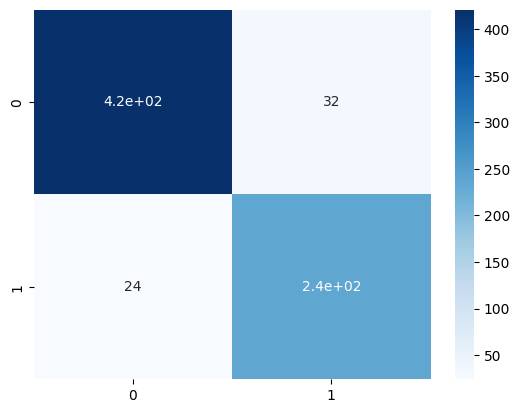

In [16]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [17]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2022'

In [18]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
